### **СЦЕНАРИЙ 1: ПРОДАЖА "КАК ЕСТЬ"**

Модель для расчета прибыли при продаже 'как есть' с учетом коммерческих затрат и риск-факторов.


Button(description='Показать исходные данные', icon='info-circle', style=ButtonStyle())

Output()

--- 
 #### **Анализ чувствительности для Сценария 1**

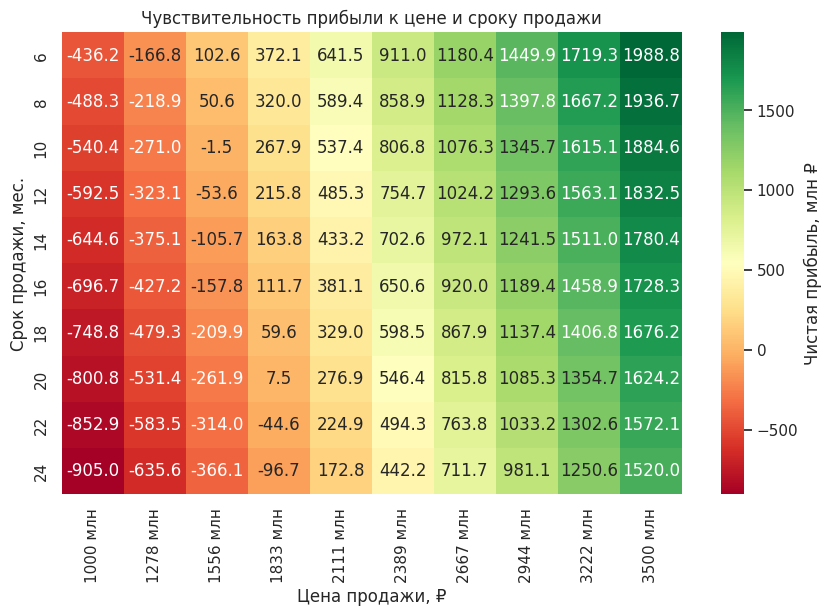

--- 
 ### **СЦЕНАРИЙ 2: FEE-DEVELOPMENT С ИНВЕСТОРОМ**

Гибкий расчет маржи и фин. показателей с возможностью включать/исключать активы и моделировать риски.


Button(description='Показать исходные данные', icon='info-circle', style=ButtonStyle())

Output()

--- 
 ### **СЦЕНАРИЙ 3: РОЗНИЧНАЯ ПРОДАЖА ВИЛЛ**

Модель для расчета прибыли при розничной продаже с учетом риск-факторов.


Button(description='Показать исходные данные', icon='info-circle', style=ButtonStyle())

Output()

--- 
 ### **Сводный визуальный анализ сценариев**

Настройте параметры в калькуляторах выше, а затем нажмите кнопку, чтобы построить сравнительный график.


Button(button_style='success', description='Сгенерировать сравнительный график', icon='chart-area', style=Butt…

Output()

In [ ]:
# -*- coding: utf-8 -*-
# Шаг 1: Установка и импорт необходимых библиотек
import ipywidgets as widgets
from ipywidgets import interact, interactive_output, VBox, HBox, Layout
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display, Markdown, clear_output
from matplotlib.lines import Line2D # Импортируем для создания ручной легенды

# Устанавливаем стиль для графиков
sns.set_theme(style="whitegrid")

# ==============================================================================
# ШАГ 2: ОБЩИЕ ВВОДНЫЕ ДАННЫЕ ПО ПРОЕКТУ
# ==============================================================================

# Наши первоначальные затраты с учетом процентов за 1-й год
VLOZHENO_S_PROTSENTAMI = 1_250_000_000 # 1 млрд основного долга + 250 млн процентов
VLOZHENO_TELO = 1_000_000_000 # Тело первоначальных инвестиций

# Годовая процентная ставка по привлеченным средствам
STAVKA_PO_DOLGU_GOD = 0.25

# ОБНОВЛЕННАЯ полная сметная стоимость проекта
POLNAYA_STOIMOST_PROEKTA = 4_590_000_000
# ОБНОВЛЕННАЯ стоимость достройки (остаток)
OSTATOK_ZATRAT_NA_DOSTROYKU = POLNAYA_STOIMOST_PROEKTA - VLOZHENO_TELO

# Себестоимость активов (из сметы)
SEBESTOIMOST_VILLA_T2 = 153_896_629
SEBESTOIMOST_SPA = 604_288_642
SEBESTOIMOST_RESTORANA = 347_874_804
SEBESTOIMOST_ABK = 55_036_276

# Исходное количество вилл
KOLVO_VILL_TIP_1_ISKHODNOE = 6
KOLVO_VILL_TIP_3_ISKHODNOE = 7

# ==============================================================================
# НОВАЯ ФУНКЦИЯ: Отображение исходных данных
# ==============================================================================
def display_initial_data():
    """Формирует и выводит емкую сводку по исходным данным проекта."""
    data_summary = """
    ### 📊 Исходные данные проекта

    #### **1. Общие финансовые вводные**
    - **Уже потрачено (тело инвестиций):** 1,000,000,000 ₽
    - **Начисленные проценты за 1-й год (25%):** 250,000,000 ₽
    - **ИТОГО ДОЛГ К ВОЗВРАТУ (на старте):** **1,250,000,000 ₽**
    - **Полная себестоимость проекта (по финальной смете):** **4,590,000,000 ₽**
    - **Остаток затрат на достройку:** 3,590,000,000 ₽

    ---
    #### **2. Детализация затрат по смете (из скана)**

    **2.1. Объекты капитального строительства (ОКС)**
    - **Виллы Тип 1** (6 шт. по 515 м²): ~108.0 млн ₽ / шт.
    - **Виллы Тип 3** (7 шт. по 463 м²): ~95.4 млн ₽ / шт.
    - **Вилла Тип 2** (1 шт. по 791 м²): 153,896,629 ₽
    - **СПА** (2709 м²): 604,288,642 ₽
    - **Ресторан** (1363 м²): 347,874,804 ₽
    - **АБК** (260 м²): 55,036,276 ₽
    - **Энергокомплекс, ливневки** (251 м²): 37,297,039 ₽
    - **Итого по ОКС:** ~2,514,513,642 ₽

    **2.2. Затраты по другим статьям**
    - **ПИР:** 155,050,000 ₽
    - **Инженерная подготовка и инфраструктура:** ~319,243,943 ₽
    - **Благоустройство, ПВС, променад:** ~501,595,273 ₽
    - **Обеспечение строительства:** ~51,393,964 ₽
    - **Операционные и коммерческие расходы:** 682,949,893 ₽
    - **Непредвиденные расходы и прочее:** 785,000,000 ₽
    """
    display(Markdown(data_summary))

# ==============================================================================
# СЦЕНАРИЙ 1: ПРОДАЖА "КАК ЕСТЬ"
# ==============================================================================
display(Markdown('### **СЦЕНАРИЙ 1: ПРОДАЖА "КАК ЕСТЬ"**'))
print("Модель для расчета прибыли при продаже 'как есть' с учетом коммерческих затрат и риск-факторов.")
def scenario_1_calculator(tsena_prodazhi_bazovaya, srok_prodazhi_mes, rynochniy_diskont):
    tsena_prodazhi_final = tsena_prodazhi_bazovaya * (1 - rynochniy_diskont / 100)
    kommercheskie_zatraty = tsena_prodazhi_final * 0.03
    dop_protsenty = VLOZHENO_S_PROTSENTAMI * STAVKA_PO_DOLGU_GOD * (srok_prodazhi_mes / 12)
    obshie_zatraty = VLOZHENO_S_PROTSENTAMI + dop_protsenty + kommercheskie_zatraty
    pribyl = tsena_prodazhi_final - obshie_zatraty
    print(f"Базовая цена продажи: {tsena_prodazhi_bazovaya:,.0f} ₽"); print(f"📉 Рыночный дисконт: {rynochniy_diskont:.1f}%"); print(f"Итоговая цена продажи: {tsena_prodazhi_final:,.0f} ₽")
    print("--------------------------------------------------")
    print(f"Коммерческие затраты (3%): {kommercheskie_zatraty:,.0f} ₽"); print(f"Доп. проценты за {srok_prodazhi_mes} мес.: {dop_protsenty:,.0f} ₽"); print(f"ИТОГО ЗАТРАТ К ВОЗВРАТУ: {obshie_zatraty:,.0f} ₽")
    print("--------------------------------------------------")
    if pribyl >= 0: print(f"ЧИСТАЯ ПРИБЫЛЬ: {pribyl:,.0f} ₽  ✅")
    else: print(f"ЧИСТЫЙ УБЫТОК: {pribyl:,.0f} ₽  ❌")

style = {'description_width': 'initial'}
s1_slider_price = widgets.FloatSlider(value=2.2e9, min=1e9, max=3e9, step=5e7, description='Базовая цена, ₽', style=style, readout_format=',.0f')
s1_slider_term = widgets.IntSlider(value=12, min=6, max=24, step=1, description='Срок продажи, мес.', style=style)
s1_slider_risk_discount = widgets.FloatSlider(value=10.0, min=0, max=40, step=0.5, description='📉 Риск: Рыночный дисконт, %', style=style)
controls_s1 = VBox([s1_slider_price, s1_slider_term, s1_slider_risk_discount], layout=Layout(width='50%'))
interactive_s1 = interactive_output(scenario_1_calculator, {'tsena_prodazhi_bazovaya': s1_slider_price, 'srok_prodazhi_mes': s1_slider_term, 'rynochniy_diskont': s1_slider_risk_discount})
s1_data_button = widgets.Button(description="Показать исходные данные", icon='info-circle'); s1_data_output = widgets.Output()
def s1_show_data(b):
    with s1_data_output: clear_output(wait=True); display_initial_data()
s1_data_button.on_click(s1_show_data)
display(HBox([controls_s1, interactive_s1]), s1_data_button, s1_data_output)

display(Markdown('--- \n #### **Анализ чувствительности для Сценария 1**'))
def plot_heatmap_s1(price_range, term_range):
    prices = np.linspace(price_range[0], price_range[1], 10); terms = np.arange(term_range[0], term_range[1] + 1, 2)
    profit_matrix = np.zeros((len(terms), len(prices)))
    for i, term in enumerate(terms):
        for j, price in enumerate(prices):
            kommercheskie_zatraty = price * 0.03; dop_protsenty = VLOZHENO_S_PROTSENTAMI * STAVKA_PO_DOLGU_GOD * (term / 12)
            profit_matrix[i, j] = price - (VLOZHENO_S_PROTSENTAMI + dop_protsenty + kommercheskie_zatraty)
    df = pd.DataFrame(profit_matrix, index=terms, columns=[f'{p/1e6:.0f} млн' for p in prices]); plt.figure(figsize=(10, 6))
    sns.heatmap(df / 1e6, annot=True, fmt=".1f", cmap="RdYlGn", cbar_kws={'label': 'Чистая прибыль, млн ₽'})
    plt.title('Чувствительность прибыли к цене и сроку продажи'); plt.xlabel('Цена продажи, ₽'); plt.ylabel('Срок продажи, мес.')
    plt.show()
plot_heatmap_s1(price_range=(1e9, 3.5e9), term_range=(6, 24))

# ==============================================================================
# СЦЕНАРИЙ 2: FEE-DEVELOPMENT С ИНВЕСТОРОМ
# ==============================================================================
display(Markdown('--- \n ### **СЦЕНАРИЙ 2: FEE-DEVELOPMENT С ИНВЕСТОРОМ**'))
print("Гибкий расчет маржи и фин. показателей с возможностью включать/исключать активы и моделировать риски.")
def scenario_2_calculator(
    tsena_villy_t1, tsena_villy_t3, prodat_villa_t2, tsena_villy_t2, prodat_spa, tsena_spa, prodat_restoran, tsena_restoran, prodat_abk, tsena_abk,
    kommerch_protsent, risk_cost_overrun, risk_price_adj):
    final_stoimost_proekta = POLNAYA_STOIMOST_PROEKTA * (1 + risk_cost_overrun / 100); price_multiplier = (1 + risk_price_adj / 100)
    vyruchka = (tsena_villy_t1 * price_multiplier * KOLVO_VILL_TIP_1_ISKHODNOE) + (tsena_villy_t3 * price_multiplier * KOLVO_VILL_TIP_3_ISKHODNOE)
    retained_assets_value = 0; retained_assets_list = []
    if prodat_villa_t2: vyruchka += tsena_villy_t2 * price_multiplier
    else: retained_assets_value += SEBESTOIMOST_VILLA_T2; retained_assets_list.append("Вилла Тип 2")
    if prodat_spa: vyruchka += tsena_spa * price_multiplier
    else: retained_assets_value += SEBESTOIMOST_SPA; retained_assets_list.append("СПА")
    if prodat_restoran: vyruchka += tsena_restoran * price_multiplier
    else: retained_assets_value += SEBESTOIMOST_RESTORANA; retained_assets_list.append("Ресторан")
    if prodat_abk: vyruchka += tsena_abk * price_multiplier
    else: retained_assets_value += SEBESTOIMOST_ABK; retained_assets_list.append("АБК")
    ebitda_analog = vyruchka - final_stoimost_proekta; kommercheskie_zatraty = vyruchka * (kommerch_protsent / 100); marzha = ebitda_analog - kommercheskie_zatraty
    final_ostatok_zatrat = final_stoimost_proekta - VLOZHENO_TELO; nash_dohod_v_kontse = vyruchka - final_ostatok_zatrat - kommercheskie_zatraty
    cash_flow = [-VLOZHENO_S_PROTSENTAMI, 0, nash_dohod_v_kontse]
    try: irr = np.irr(cash_flow) * 100; irr_text = f"{irr:.2f}%"
    except Exception: irr_text = "N/A"
    print("--- ФИНАНСОВЫЕ ПОКАЗАТЕЛИ СДЕЛКИ (с учетом рисков) ---")
    print(f"Полная себестоимость (с перерасходом {risk_cost_overrun:.1f}%): {final_stoimost_proekta:,.0f} ₽"); print(f"Общая выручка (с коррекцией {risk_price_adj:.1f}%): {vyruchka:,.0f} ₽"); print(f"Коммерческие затраты ({kommerch_protsent:.1f}%): {kommercheskie_zatraty:,.0f} ₽")
    print("--------------------------------------------------")
    if marzha >= 0: print(f"НАША ЧИСТАЯ МАРЖА: {marzha:,.0f} ₽  ✅")
    else: print(f"НАШ УБЫТОК: {marzha:,.0f} ₽  ❌")
    if retained_assets_value > 0: print(f"💡 ПЛЮС остаются активы ({', '.join(retained_assets_list)}) себестоимостью: {retained_assets_value:,.0f} ₽")
    print("\n--- ИНВЕСТИЦИОННЫЕ МЕТРИКИ ---"); print(f"📈 IRR на вложенные средства: {irr_text}"); print(f"💰 Прибыль до налогов и комм.расходов (аналог EBITDA): {ebitda_analog:,.0f} ₽")

s2_slider_t1 = widgets.FloatSlider(value=250e6, min=150e6, max=350e6, step=10e6, description='Цена виллы Тип 1', style=style, readout_format=',.0f'); s2_slider_t3 = widgets.FloatSlider(value=220e6, min=120e6, max=300e6, step=10e6, description='Цена виллы Тип 3', style=style, readout_format=',.0f')
s2_check_t2 = widgets.Checkbox(value=True, description='Продать Виллу Тип 2?'); s2_slider_t2 = widgets.FloatSlider(value=400e6, min=250e6, max=600e6, step=10e6, description='Цена', style=style, readout_format=',.0f')
s2_check_spa = widgets.Checkbox(value=True, description='Продать СПА?'); s2_slider_spa = widgets.FloatSlider(value=800e6, min=700e6, max=1.2e9, step=25e6, description='Цена', style=style, readout_format=',.0f')
s2_check_restoran = widgets.Checkbox(value=True, description='Продать Ресторан?'); s2_slider_restoran = widgets.FloatSlider(value=450e6, min=380e6, max=600e6, step=10e6, description='Цена', style=style, readout_format=',.0f')
s2_check_abk = widgets.Checkbox(value=True, description='Продать АБК?'); s2_slider_abk = widgets.FloatSlider(value=35e6, min=20e6, max=50e6, step=1e6, description='Цена', style=style, readout_format=',.0f')
s2_slider_kommerch = widgets.FloatSlider(value=5.0, min=5.0, max=10.0, step=0.5, description='Коммерческие затраты, %', style=style)
s2_slider_risk_cost = widgets.FloatSlider(value=0, min=0, max=30, step=1, description='📈 Риск: Перерасход сметы, %', style=style); s2_slider_risk_price = widgets.FloatSlider(value=0, min=-30, max=10, step=1, description='📉 Риск: Коррекция цены, %', style=style)
controls_s2 = VBox([HBox([s2_slider_t1, s2_slider_t3]), HBox([s2_check_t2, s2_slider_t2]), HBox([s2_check_spa, s2_slider_spa]), HBox([s2_check_restoran, s2_slider_restoran]), HBox([s2_check_abk, s2_slider_abk]), s2_slider_kommerch, s2_slider_risk_cost, s2_slider_risk_price], layout=Layout(width='60%'))
interactive_s2 = interactive_output(scenario_2_calculator, {'tsena_villy_t1': s2_slider_t1, 'tsena_villy_t3': s2_slider_t3, 'prodat_villa_t2': s2_check_t2, 'tsena_villy_t2': s2_slider_t2, 'prodat_spa': s2_check_spa, 'tsena_spa': s2_slider_spa, 'prodat_restoran': s2_check_restoran, 'tsena_restoran': s2_slider_restoran, 'prodat_abk': s2_check_abk, 'tsena_abk': s2_slider_abk, 'kommerch_protsent': s2_slider_kommerch, 'risk_cost_overrun': s2_slider_risk_cost, 'risk_price_adj': s2_slider_risk_price})
s2_data_button = widgets.Button(description="Показать исходные данные", icon='info-circle'); s2_data_output = widgets.Output()
def s2_show_data(b):
    with s2_data_output: clear_output(wait=True); display_initial_data()
s2_data_button.on_click(s2_show_data)
display(HBox([controls_s2, interactive_s2], layout=Layout(justify_content='space-between')), s2_data_button, s2_data_output)

# ==============================================================================
# СЦЕНАРИЙ 3: РОЗНИЧНАЯ ПРОДАЖА
# ==============================================================================
display(Markdown('--- \n ### **СЦЕНАРИЙ 3: РОЗНИЧНАЯ ПРОДАЖА ВИЛЛ**'))
print("Модель для расчета прибыли при розничной продаже с учетом риск-факторов.")
def scenario_3_calculator(
    kolvo_t1, tsena_t1, kolvo_t2, tsena_t2, kolvo_t3, tsena_t3, prodat_spa, tsena_spa, prodat_restoran, tsena_restoran, prodat_abk, tsena_abk,
    marketing_pct, stavka_novogo_dolga, srok_proekta_gody, risk_cost_overrun, risk_price_adj):
    price_multiplier = (1 + risk_price_adj / 100); vyruchka = (kolvo_t1 * tsena_t1 * price_multiplier) + (kolvo_t2 * tsena_t2 * price_multiplier) + (kolvo_t3 * tsena_t3 * price_multiplier)
    final_ostatok_zatrat = OSTATOK_ZATRAT_NA_DOSTROYKU * (1 + risk_cost_overrun / 100); retained_assets_value = 0; retained_assets_list = ["СПА", "Ресторан", "АБК"]
    if prodat_spa: vyruchka += tsena_spa * price_multiplier; retained_assets_list.remove("СПА")
    else: retained_assets_value += SEBESTOIMOST_SPA
    if prodat_restoran: vyruchka += tsena_restoran * price_multiplier; retained_assets_list.remove("Ресторан")
    else: retained_assets_value += SEBESTOIMOST_RESTORANA
    if prodat_abk: vyruchka += tsena_abk * price_multiplier; retained_assets_list.remove("АБК")
    else: retained_assets_value += SEBESTOIMOST_ABK
    zatraty_marketing = vyruchka * (marketing_pct / 100); zatraty_novyy_dolg = final_ostatok_zatrat * (stavka_novogo_dolga / 100) * (srok_proekta_gody / 2)
    obshie_zatraty = VLOZHENO_S_PROTSENTAMI + final_ostatok_zatrat + zatraty_marketing + zatraty_novyy_dolg; pribyl = vyruchka - obshie_zatraty
    print(f"Выручка (с коррекцией {risk_price_adj:.1f}%): {vyruchka:,.0f} ₽"); print("--- Расходы (с учетом рисков) ---"); print(f"1. Возврат старого долга: {VLOZHENO_S_PROTSENTAMI:,.0f} ₽")
    print(f"2. Достройка (с перерасходом {risk_cost_overrun:.1f}%): {final_ostatok_zatrat:,.0f} ₽"); print(f"3. % по новому долгу: {zatraty_novyy_dolg:,.0f} ₽"); print(f"4. Маркетинг: {zatraty_marketing:,.0f} ₽"); print(f"ИТОГО ЗАТРАТ: {obshie_zatraty:,.0f} ₽")
    print("--------------------------------------------------")
    if pribyl >= 0: print(f"ЧИСТАЯ ПРИБЫЛЬ: {pribyl:,.0f} ₽  ✅")
    else: print(f"ЧИСТЫЙ УБЫТОК: {pribyl:,.0f} ₽  ❌")
    if retained_assets_value > 0: print(f"\n💡 ПЛЮС остаются активы ({', '.join(retained_assets_list)}) себестоимостью: {retained_assets_value:,.0f} ₽")

s3_slider_kolvo_t1=widgets.IntSlider(value=6,min=0,max=7,description='Кол-во вилл Тип 1',style=style); s3_slider_tsena_t1=widgets.FloatSlider(value=300e6,min=150e6,max=450e6,step=10e6,description='Цена',style=style,readout_format=',.0f')
s3_slider_kolvo_t2=widgets.IntSlider(value=1,min=0,max=1,description='Кол-во вилл Тип 2',style=style); s3_slider_tsena_t2=widgets.FloatSlider(value=400e6,min=250e6,max=600e6,step=10e6,description='Цена',style=style,readout_format=',.0f')
s3_slider_kolvo_t3=widgets.IntSlider(value=7,min=0,max=7,description='Кол-во вилл Тип 3',style=style); s3_slider_tsena_t3=widgets.FloatSlider(value=250e6,min=120e6,max=350e6,step=10e6,description='Цена',style=style,readout_format=',.0f')
s3_check_spa=widgets.Checkbox(value=False,description='Продать СПА?'); s3_slider_tsena_spa=widgets.FloatSlider(value=800e6,min=700e6,max=1.2e9,step=25e6,description='Цена',style=style,readout_format=',.0f')
s3_check_restoran=widgets.Checkbox(value=False,description='Продать Ресторан?'); s3_slider_tsena_restoran=widgets.FloatSlider(value=450e6,min=380e6,max=600e6,step=10e6,description='Цена',style=style,readout_format=',.0f')
s3_check_abk=widgets.Checkbox(value=False,description='Продать АБК?'); s3_slider_tsena_abk=widgets.FloatSlider(value=35e6,min=20e6,max=50e6,step=1e6,description='Цена',style=style,readout_format=',.0f')
s3_slider_marketing=widgets.FloatSlider(value=10,min=5,max=20,step=0.5,description='Маркетинг, %',style=style); s3_slider_rate=widgets.FloatSlider(value=18,min=10,max=30,step=0.5,description='Ставка нов. долга, %',style=style); s3_slider_term=widgets.FloatSlider(value=3,min=2,max=5,step=0.5,description='Срок проекта, лет',style=style)
s3_slider_risk_cost = widgets.FloatSlider(value=0, min=0, max=30, step=1, description='📈 Риск: Перерасход, %', style=style); s3_slider_risk_price = widgets.FloatSlider(value=0, min=-40, max=10, step=1, description='📉 Риск: Коррекция цены, %', style=style)
controls_left_s3 = VBox([HBox([s3_slider_kolvo_t1, s3_slider_tsena_t1]), HBox([s3_slider_kolvo_t2, s3_slider_tsena_t2]), HBox([s3_slider_kolvo_t3, s3_slider_tsena_t3]), HBox([s3_check_spa, s3_slider_tsena_spa]), HBox([s3_check_restoran, s3_slider_tsena_restoran]), HBox([s3_check_abk, s3_slider_tsena_abk])], layout=Layout(min_width='520px'))
controls_right_s3 = VBox([s3_slider_marketing, s3_slider_rate, s3_slider_term, s3_slider_risk_cost, s3_slider_risk_price], layout=Layout(min_width='300px'))
controls_s3=HBox([controls_left_s3, controls_right_s3])
out_s3=interactive_output(scenario_3_calculator,{'kolvo_t1':s3_slider_kolvo_t1,'tsena_t1':s3_slider_tsena_t1,'kolvo_t2':s3_slider_kolvo_t2,'tsena_t2':s3_slider_tsena_t2,'kolvo_t3':s3_slider_kolvo_t3,'tsena_t3':s3_slider_tsena_t3,'prodat_spa':s3_check_spa,'tsena_spa':s3_slider_tsena_spa,'prodat_restoran':s3_check_restoran,'tsena_restoran':s3_slider_tsena_restoran,'prodat_abk':s3_check_abk,'tsena_abk':s3_slider_tsena_abk,'marketing_pct':s3_slider_marketing,'stavka_novogo_dolga':s3_slider_rate,'srok_proekta_gody':s3_slider_term, 'risk_cost_overrun': s3_slider_risk_cost, 'risk_price_adj': s3_slider_risk_price})
s3_data_button = widgets.Button(description="Показать исходные данные", icon='info-circle'); s3_data_output = widgets.Output()
def s3_show_data(b):
    with s3_data_output: clear_output(wait=True); display_initial_data()
s3_data_button.on_click(s3_show_data)
display(HBox([controls_s3,out_s3],layout=Layout(justify_content='space-between')), s3_data_button, s3_data_output)

# ==============================================================================
# СВОДНЫЙ ВИЗУАЛЬНЫЙ АНАЛИЗ СЦЕНАРИЕВ
# ==============================================================================
display(Markdown('--- \n ### **Сводный визуальный анализ сценариев**'))
print("Настройте параметры в калькуляторах выше, а затем нажмите кнопку, чтобы построить сравнительный график.")
def get_scenario_1_results():
    tsena_final = s1_slider_price.value * (1 - s1_slider_risk_discount.value / 100); zatraty = VLOZHENO_S_PROTSENTAMI + (tsena_final*0.03) + (VLOZHENO_S_PROTSENTAMI * STAVKA_PO_DOLGU_GOD * (s1_slider_term.value / 12))
    pribyl = tsena_final - zatraty; return {'profit': pribyl, 'revenue': tsena_final}
def get_scenario_2_results():
    p_mult = (1 + s2_slider_risk_price.value / 100); vyruchka = (s2_slider_t1.value*p_mult*KOLVO_VILL_TIP_1_ISKHODNOE) + (s2_slider_t3.value*p_mult*KOLVO_VILL_TIP_3_ISKHODNOE)
    if s2_check_t2.value: vyruchka += s2_slider_t2.value * p_mult
    if s2_check_spa.value: vyruchka += s2_slider_spa.value * p_mult
    if s2_check_restoran.value: vyruchka += s2_slider_restoran.value * p_mult
    if s2_check_abk.value: vyruchka += s2_slider_abk.value * p_mult
    final_cost = POLNAYA_STOIMOST_PROEKTA * (1 + s2_slider_risk_cost.value / 100)
    marzha = vyruchka - final_cost - (vyruchka * s2_slider_kommerch.value / 100); return {'profit': marzha, 'revenue': vyruchka}
def get_scenario_3_results():
    p_mult = (1 + s3_slider_risk_price.value / 100); vyruchka = (s3_slider_kolvo_t1.value*s3_slider_tsena_t1.value*p_mult) + (s3_slider_kolvo_t2.value*s3_slider_tsena_t2.value*p_mult) + (s3_slider_kolvo_t3.value*s3_slider_tsena_t3.value*p_mult)
    if s3_check_spa.value: vyruchka += s3_slider_tsena_spa.value * p_mult
    if s3_check_restoran.value: vyruchka += s3_slider_tsena_restoran.value * p_mult
    if s3_check_abk.value: vyruchka += s3_slider_tsena_abk.value * p_mult
    final_ostatok_zatrat = OSTATOK_ZATRAT_NA_DOSTROYKU * (1 + s3_slider_risk_cost.value / 100)
    zatraty_dop = (vyruchka * s3_slider_marketing.value/100) + (final_ostatok_zatrat * (s3_slider_rate.value/100) * (s3_slider_term.value/2))
    pribyl = vyruchka - (VLOZHENO_S_PROTSENTAMI + final_ostatok_zatrat + zatraty_dop); return {'profit': pribyl, 'revenue': vyruchka}

summary_button = widgets.Button(description="Сгенерировать сравнительный график", button_style='success', icon='chart-area'); summary_output = widgets.Output()
def generate_summary_plot(b):
    with summary_output:
        summary_output.clear_output(wait=True)
        s1_res = get_scenario_1_results(); s2_res = get_scenario_2_results(); s3_res = get_scenario_3_results()
        data = {
            'Сценарий': ['1: Продажа "как есть"', '2: Fee-Development', '3: Розничная продажа'],
            'Фин. результат (прибыль), млн ₽': [s1_res['profit']/1e6, s2_res['profit']/1e6, s3_res['profit']/1e6],
            'Степень реализуемости (1-10)': [8, 6, 3], 'Выручка, млрд ₽': [round(s1_res['revenue']/1e9, 2), round(s2_res['revenue']/1e9, 2), round(s3_res['revenue']/1e9, 2)]
        }
        df = pd.DataFrame(data); fig, ax = plt.subplots(figsize=(12, 8))
        sns.scatterplot(
            data=df, x='Фин. результат (прибыль), млн ₽', y='Степень реализуемости (1-10)', size='Выручка, млрд ₽', hue='Сценарий', sizes=(500, 5000),
            alpha=0.7, palette='viridis', style='Сценарий', markers=['o', 's', 'D'], ax=ax, legend=False)
        for i in range(df.shape[0]):
            ax.text(x=df['Фин. результат (прибыль), млн ₽'][i], y=df['Степень реализуемости (1-10)'][i] + 0.35, s=df['Сценарий'][i], fontdict=dict(color='black',size=12), ha='center')
        colors = sns.color_palette('viridis', n_colors=3); markers = ['o', 's', 'D']
        scenario_handles = [Line2D([0], [0], marker=markers[i], color=colors[i], label=df['Сценарий'][i], markersize=10, linestyle='None') for i in range(len(df))]
        legend1 = ax.legend(handles=scenario_handles, title='Сценарий', bbox_to_anchor=(1.02, 1), loc='upper left', title_fontsize='13', fontsize='11'); ax.add_artist(legend1)
        size_values = sorted(df['Выручка, млрд ₽'].unique())
        size_handles = [plt.scatter([], [], s=v*250, color='grey', alpha=0.6, label=f'{v} млрд ₽') for v in size_values]
        ax.legend(handles=size_handles, title='Выручка', bbox_to_anchor=(1.02, 0.65), loc='upper left', title_fontsize='13', fontsize='11', labelspacing=1.5)
        ax.set_title('Сравнение сценариев: Финансовый результат vs. Реализуемость', fontsize=16)
        ax.axhline(0, color='grey', linestyle='--'); ax.axvline(0, color='grey', linestyle='--'); ax.grid(True)
        fig.tight_layout(rect=[0, 0, 0.85, 1]); plt.show()
summary_button.on_click(generate_summary_plot)
display(summary_button, summary_output)